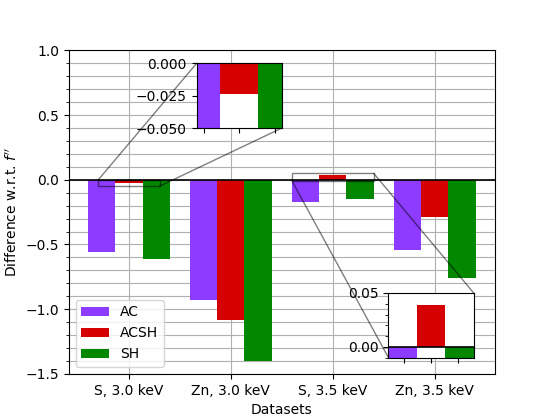

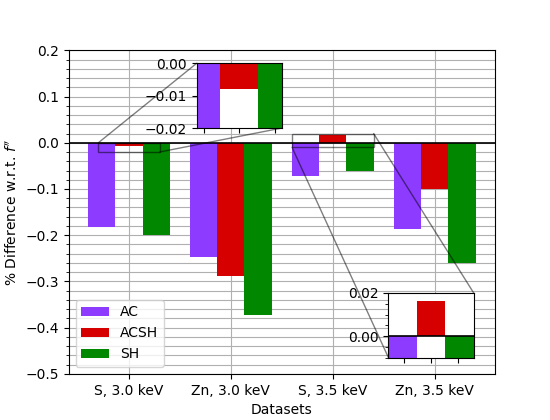

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc
import matplotlib.ticker as mticker
%matplotlib widget
theoretical = np.array([
    3.05939,
    3.76464,
    2.39044,
    2.91247
])
ac = np.array([
    2.49912,
    2.83766,
    2.21949,
    2.36736
])
sh = np.array([
    2.45008,
    2.36456,
    2.24339,
    2.1546
])
acsh = np.array([
    3.03552,
    2.68316,
    2.42956,
    2.62166])

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())



fig, ax = plt.subplots(figsize=(5.5,4.2))
x_cat = ["S, 3.0 keV", "Zn, 3.0 keV","S, 3.5 keV","Zn, 3.5 keV"]
bar_plot(ax, {'AC':ac - theoretical,'ACSH':acsh- theoretical,'SH':sh- theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(x_cat)
ax.set_ylabel("Difference w.r.t. $f''$")
ax.set_xlabel("Datasets")
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.grid(which='both')
ax.axhline(0, c='black',lw=1.2)
ax.set_ylim(-1.5,1)
leg = ax.get_legend()
leg.set_loc('lower left')
x1, x2, y1, y2 = -0.3, 0.3, -0.05, 0
axins = ax.inset_axes([0.3,0.76,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
bar_plot(axins, {'AC':ac - theoretical,'ACSH':acsh- theoretical,'SH':sh- theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
x1, x2, y1, y2 = 1.6, 2.4, -0.01, 0.05
axins = ax.inset_axes([0.75,0.05,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
axins.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_axisbelow(True)

axins.axhline(0, c='black',lw=1.2)
bar_plot(axins, {'AC':ac - theoretical,'ACSH':acsh- theoretical,'SH':sh- theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/FDP_diff.pdf')


# PERCENTAGE DIFFERENCE

fig, ax = plt.subplots(figsize=(5.5,4.2))
x_cat = ["S, 3.0 keV", "Zn, 3.0 keV","S, 3.5 keV","Zn, 3.5 keV"]
bar_plot(ax, {'AC':(ac - theoretical)/theoretical,'ACSH':(acsh- theoretical)/theoretical,'SH':(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(x_cat)
ax.set_ylabel("% Difference w.r.t. $f''$")
ax.set_xlabel("Datasets")
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.grid(which='both')
ax.axhline(0, c='black',lw=1.2)
ax.set_ylim(-0.5,0.2)
leg = ax.get_legend()
leg.set_loc('lower left')
x1, x2, y1, y2 = -0.3, 0.3, -0.02, 0
axins = ax.inset_axes([0.3,0.76,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
bar_plot(axins, {'AC':(ac - theoretical)/theoretical,'ACSH':(acsh- theoretical)/theoretical,'SH':(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
x1, x2, y1, y2 = 1.6, 2.4, -0.01, 0.02
axins = ax.inset_axes([0.75,0.05,0.2,0.2], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[])
axins.yaxis.set_major_formatter(mticker.ScalarFormatter())
axins.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_axisbelow(True)

axins.axhline(0, c='black',lw=1.2)
bar_plot(axins, {'AC':(ac - theoretical)/theoretical,'ACSH':(acsh- theoretical)/theoretical,'SH':(sh- theoretical)/theoretical}, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.get_legend().set_visible(False)
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/FDP_percent_diff.pdf')